In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
# Veri setinin ilk beş satırını ekrana yazdır.
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]

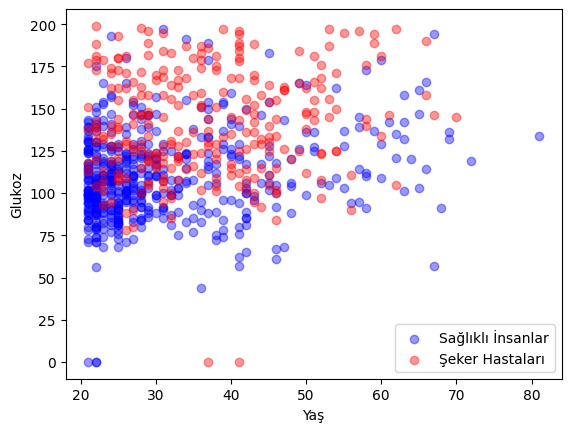

In [5]:
# Yaş ve glukoz değerlerine göre nokta grafiği çizilir ve renklendirilir.
plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="blue", label="Sağlıklı İnsanlar", alpha=0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="Şeker Hastaları", alpha=0.4)
plt.xlabel("Yaş")
plt.ylabel("Glukoz")
plt.legend()
plt.show()


In [6]:
# Bağımlı değişken 'Outcome' ayrılır ve 'y' değişkenine atanır.
y = data.Outcome.values

In [7]:
# Bağımsız değişkenler 'Outcome' sütunu hariç tutularak 'x_ham_veri' değişkenine atanır.
x_ham_veri = data.drop(["Outcome"], axis=1)



In [8]:
# Min-Max normalizasyonu uygulanır.
x = (x_ham_veri - np.min(x_ham_veri)) / (np.max(x_ham_veri) - np.min(x_ham_veri))



In [9]:
# Veri seti eğitim ve test setlerine ayrılır.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)



In [10]:
# K-En Yakın Komşular (KNN) sınıflandırıcı modeli oluşturulur ve eğitilir (k=3).
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [11]:
# Test seti üzerinde tahmin yapılır ve modelin doğruluğu hesaplanıp yazdırılır.
print("k = 3 için test setinin doğruluk sonucu:", knn.score(x_test, y_test))


k = 3 için test setinin doğruluk sonucu: 0.7402597402597403


In [12]:
#Farklı k değerleri için modelin performansı değerlendirilir.
for k in range(1, 11):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(x_train, y_train)
    print(f"{k}. k değeri için doğruluk oranı: %{knn2.score(x_test, y_test) * 100}")
    
# en iyi sonuc veren k değeri = 6 



1. k değeri için doğruluk oranı: %72.07792207792207
2. k değeri için doğruluk oranı: %72.72727272727273
3. k değeri için doğruluk oranı: %74.02597402597402
4. k değeri için doğruluk oranı: %72.07792207792207
5. k değeri için doğruluk oranı: %73.37662337662337
6. k değeri için doğruluk oranı: %77.27272727272727
7. k değeri için doğruluk oranı: %75.97402597402598
8. k değeri için doğruluk oranı: %76.62337662337663
9. k değeri için doğruluk oranı: %76.62337662337663
10. k değeri için doğruluk oranı: %75.97402597402598


In [14]:
# Yeni bir hasta tahmini için Min-Max normalizasyonu yapılır ve model üzerinden tahminde bulunulur.
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

new_prediction = knn.predict(sc.transform(np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])))
print("Yeni bir hastanın tahmini:", new_prediction[0])

Yeni bir hastanın tahmini: 1


c:\Users\Taner\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Taner\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
